In [123]:
#importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import plotly.express as px
import scipy.stats as stats

# funciones
from utils.funciones import to_1D
# from funciones import get_data

In [124]:
#Cargar el archivo csv
path = 'C:/THE BRIDGE_GIT/Machine_Learning/anime_score_detection_model_regresion/src/'
# df_anime = pd.read_csv(path + "data/raw/anime.csv", na_values = ['Unknown'],index_col = 0)
df_anime = pd.read_csv(path + "data/raw/anime.csv", na_values = ['Unknown'])

In [125]:
#Ver el dataset
df_anime.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",NaN,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [126]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17499 non-null  object 
 4   English name   6997 non-null   object 
 5   Japanese name  17514 non-null  object 
 6   Type           17525 non-null  object 
 7   Episodes       17046 non-null  float64
 8   Aired          17253 non-null  object 
 9   Premiered      4745 non-null   object 
 10  Producers      9768 non-null   object 
 11  Licensors      3946 non-null   object 
 12  Studios        10483 non-null  object 
 13  Source         13995 non-null  object 
 14  Duration       17007 non-null  object 
 15  Rating         16874 non-null  object 
 16  Ranked         15800 non-null  float64
 17  Popularity     17562 non-null  int64  
 18  Member

In [127]:
print(f"Número total de registros: {len(df_anime)}")

Número total de registros: 17562


In [128]:
#Ver valores missing a comparación con el total de registros 
print(df_anime.isnull().sum()/len(df_anime) * 100)

MAL_ID            0.000000
Name              0.000000
Score            29.273431
Genres            0.358729
English name     60.158296
Japanese name     0.273317
Type              0.210682
Episodes          2.938162
Aired             1.759481
Premiered        72.981437
Producers        44.379911
Licensors        77.531033
Studios          40.308621
Source           20.310899
Duration          3.160232
Rating            3.917549
Ranked           10.033026
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
Plan to Watch     0.000000
Score-10          2.488327
Score-9          18.033254
Score-8           7.806628
Score-7           2.864138
Score-6           2.909691
Score-5           3.325362
Score-4           5.563148
Score-3           7.442205
Score-2           9.093497
Score-1           2.613598
dtype: float64


In [129]:
df_anime.describe()

,MAL_ID,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,17562.000000,12421.000000,17046.000000,15800.00000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,...,17125.000000,14395.000000,16191.000000,17059.000000,17051.000000,16978.000000,16585.000000,16255.000000,15965.00000,17103.000000
mean,21477.192347,6.509999,11.525519,7895.21000,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,...,2546.182715,3905.437027,4846.905194,3997.244329,1964.125682,990.303982,453.539162,212.773547,128.39524,123.075250
std,14900.093170,0.886717,47.348640,4557.31849,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,...,17081.840149,19891.721835,20597.991435,14275.126598,6462.018509,3256.272467,1748.658929,877.018359,573.74176,674.672906
min,1.000000,1.850000,1.000000,0.00000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,5953.500000,5.930000,1.000000,3944.00000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,...,7.000000,7.000000,7.000000,12.000000,16.000000,19.000000,10.000000,7.000000,5.00000,6.000000
50%,22820.000000,6.520000,2.000000,7896.00000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,...,39.000000,71.000000,92.000000,140.000000,144.000000,111.000000,50.000000,27.000000,18.00000,16.000000
75%,35624.750000,7.140000,12.000000,11845.25000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,...,381.000000,735.000000,1073.000000,1370.500000,910.500000,528.750000,213.000000,104.000000,63.00000,56.000000
max,48492.000000,9.190000,3057.000000,15780.00000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,...,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.00000,33750.000000


In [130]:
#Lectura de dataset por temporada de anime
df_season = pd.read_csv(path + "data/raw/anime_season.csv")

In [131]:
#Ver dataframe
df_season

,Month_emision,Season
0,Jan,Winter
1,Feb,Winter
2,Mar,Winter
3,Apr,Spring
4,May,Spring
5,Jun,Spring
6,Jul,Summer
7,Aug,Summer
8,Sep,Summer
9,Oct,Fall


# Limpieza de Datos

In [132]:
#Eliminar columnas que no se usarán para el análisis
df_anime.drop(['Name' , 'English name' , 'Japanese name','Watching', 'On-Hold', 'Dropped', 'Ranked', 'Popularity',
              'Licensors','Plan to Watch','Producers','Source','Completed','Favorites','Duration','Members'] , axis = 1 , inplace = True)

In [133]:
df_anime.columns

Index(['MAL_ID', 'Score', 'Genres', 'Type', 'Episodes', 'Aired', 'Premiered',
       'Studios', 'Rating', 'Score-10', 'Score-9', 'Score-8', 'Score-7',
       'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

### Transformaciones

In [134]:
#Creación de campo para obtener el año de emision del anime
df_anime['Start_year'] = df_anime['Aired'].dropna(axis = 0).apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[1] if len(x) > 1 else x[0] ).apply(
                          lambda x : x.replace(' ', ''))

In [135]:
# Creación de campo para obtener el mes de emision del anime
df_anime['Start_Month'] = df_anime['Aired'].dropna(axis = 0).apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[0] ).apply(
                              lambda x : x.split(' ')[0])

In [136]:
# Creación de campo que contenga la temporada cuando se emitió el anime
df_anime['Season'] = df_anime['Premiered'].dropna(axis = 0).apply(lambda x : x.split(' ')[0])

In [137]:
df_anime = df_anime.assign(New_score=lambda x:((x['Score-10']*10 + x['Score-9']*9 + x['Score-8']*8
  + x['Score-7']*7 + x['Score-6']*6 + x['Score-5']*5 + x['Score-4']*4 + x['Score-3']*3 + x['Score-2']*2
  + x['Score-1'])/(x['Score-10'] + x['Score-9'] + x['Score-8']+ x['Score-7'] + x['Score-6'] + x['Score-5']
  + x['Score-4'] + x['Score-3'] + x['Score-2']+ x['Score-1'])))

In [138]:
df_anime_1 = pd.merge(
    left=df_anime,right=df_season, how='left', left_on='Start_Month', right_on='Month_emision'
    )

In [139]:
df_anime_1['Start_season'] = np.where(df_anime_1['Season_x'].isna(),
                                        df_anime_1['Season_y'],df_anime_1['Season_x'])

df_anime_1['New_score2'] = np.where(df_anime_1['Score'].isna(),
                                    df_anime_1['New_score'],df_anime_1['Score'])

In [140]:
#Eliminar columnas que no se usarán para el análisis
df_anime_1.drop(['Premiered','Aired',
       'Start_Month','Season_x','Month_emision','Season_y', 'Score-10', 
       'Score-9', 'Score-8', 'Score-7', 'Score-6','Score-5', 'Score-4', 'Score-3', 
       'Score-2', 'Score-1','Score','New_score'] , axis = 1 , inplace = True)

In [141]:
df_anime_1.rename(columns={'New_score2':'Score'}, inplace=True)

In [142]:
# df_range = pd.DataFrame()
# max_episode = int(df_anime_1['Episodes'].max()) + 12
# for index in range(len(df_anime_1)):
#   for i in range(1, max_episode, 12):
#     val2 = i + 12
#     if df_anime_1.Episodes.loc[index] >= i and df_anime_1.Episodes.loc[index] < val2:
#       nueva_fila = {"MAL_ID": int(df_anime_1.MAL_ID.loc[index]),"range_episodes":'[' + str(i) + ' - ' + str(val2) + ']'} # creamos un diccionario
#       df_range = df_range.append(nueva_fila, ignore_index=True)

# df_anime_1 = pd.merge(df_anime_1, df_range, on = "MAL_ID", how='outer')

In [143]:
#Eliminando valores missing
df_anime_2 = df_anime_1.dropna(axis = 0).copy()

In [144]:
#Se cambia el tipo de dato de las columnas Score y Episodes
# a el tipo de dato que deberían tener
df_anime_2['Score'] = df_anime_2['Score'].astype('float')
df_anime_2['Episodes'] = df_anime_2['Episodes'].astype('int')

In [145]:
df_anime_2[['Episodes','Score']].info()
#Porcentaje de malores missing hallados
print(df_anime_2.isnull().sum()/len(df_anime_2) * 100)
#Nuevo numero de registros
print(f"Número total de registros antes: {len(df_anime)}")
print(f"Número total de registros ahora: {len(df_anime_2)}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 0 to 17552
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Episodes  9083 non-null   int32  
 1   Score     9083 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 177.4 KB
MAL_ID          0.0
Genres          0.0
Type            0.0
Episodes        0.0
Studios         0.0
Rating          0.0
Start_year      0.0
Start_season    0.0
Score           0.0
dtype: float64
Número total de registros antes: 17562
Número total de registros ahora: 9083


In [146]:
df_anime_2.columns

Index(['MAL_ID', 'Genres', 'Type', 'Episodes', 'Studios', 'Rating',
       'Start_year', 'Start_season', 'Score'],
      dtype='object')

outliers

In [163]:
# import numpy
import numpy as np

# calculate mean
mean = np.mean(df_anime_2['Episodes'].values) 
# calculate standard deviation
sd = np.std(df_anime_2['Episodes'].values)# determine a threhold
threshold = 3

# create empty list to store outliers
outliers = []

# detect outlier
for i in df_anime_2['Episodes'].values: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list# print outliers    

outliers.sort()
print("The detected outliers are: ", outliers)

The detected outliers are:  [142, 143, 145, 146, 147, 148, 148, 148, 150, 151, 151, 153, 153, 154, 155, 156, 156, 160, 161, 163, 164, 164, 167, 170, 172, 175, 178, 178, 180, 182, 191, 192, 193, 195, 195, 199, 201, 203, 214, 215, 220, 224, 237, 237, 243, 258, 276, 283, 291, 296, 296, 300, 305, 330, 331, 358, 366, 373, 500, 526, 694, 1428, 1471, 1787, 1818]


In [150]:
min_outlier = np.min(outliers)
max_outlier = np.max(outliers)
count_outliers = np.count_nonzero(outliers)
print('min_outlier:',min_outlier,'\nmax_outlier:',max_outlier, '\ncount_outliers:',count_outliers)

min_outlier: 142 
max_outlier: 1818 
count_outliers: 65


In [165]:
# Remover outliers encontrados
df_anime_2 = df_anime_2[~(df_anime_2.Episodes.isin(outliers))]

fin outliers

# Análisis
## Variables Numericas
### Score

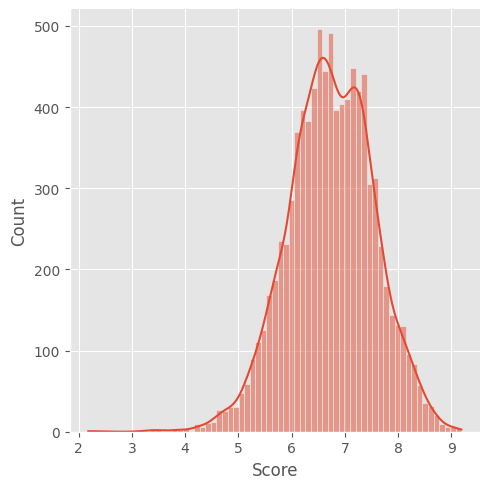

In [87]:
#Distribución de  de Score
sns.displot(df_anime_2.Score, kde = True)

<AxesSubplot:ylabel='Score'>

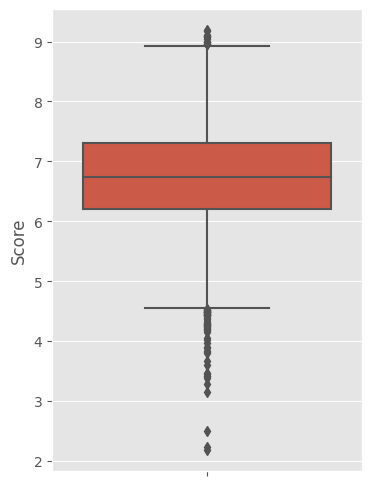

In [88]:
plt.figure(figsize=(4,6))
sns.boxplot(data = df_anime_2 , y = 'Score')

### Episodes

In [89]:
df_anime_2.Episodes.describe()

count    9018.000000
mean       11.853959
std        16.852098
min         1.000000
25%         1.000000
50%         4.000000
75%        13.000000
max       140.000000
Name: Episodes, dtype: float64

<AxesSubplot:ylabel='Episodes'>

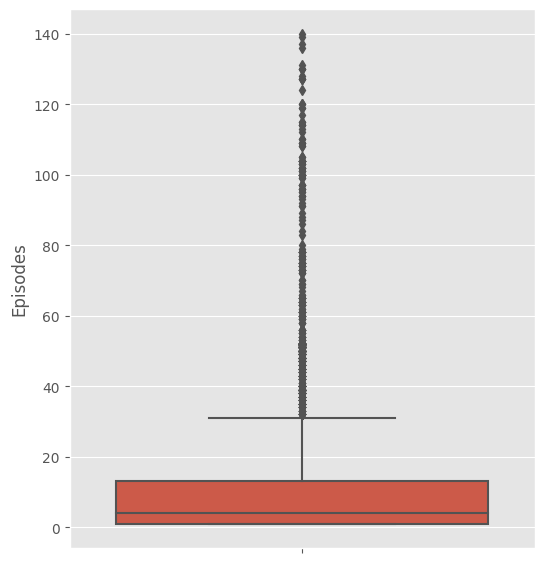

In [167]:
plt.figure(figsize=(6,7))
sns.boxplot(data = df_anime_2 , y = 'Episodes'  )

## Variables Categoricas

### Genres

In [32]:
df_anime_2['Genres_Split'] = df_anime_2['Genres'].apply(lambda x : x.replace(' ' , ''))
df_anime_2['Genres_Split'] = df_anime_2['Genres_Split'].apply(lambda x : x.split(','))

In [33]:
gs_top10 = to_1D(df_anime_2['Genres_Split']).value_counts().head(10).index
ngs_top10  = to_1D(df_anime_2['Genres_Split']).value_counts().head(10)

NameError: name 'to_1D' is not defined

In [ ]:
#Top 10
ngs_top10

Comedy         3937
Action         2873
Fantasy        1987
Adventure      1968
Sci-Fi         1899
Drama          1785
Shounen        1617
Romance        1496
School         1291
SliceofLife    1214
dtype: int64

<AxesSubplot:>

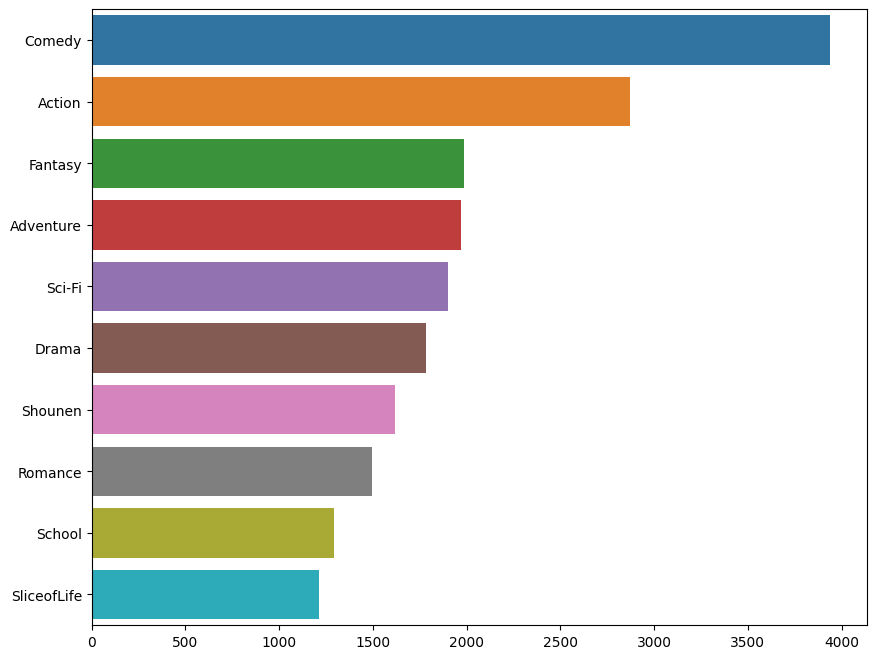

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = gs_top10 , x = ngs_top10 )

### Type

In [ ]:
df_anime_2['Type'].value_counts()

TV         3707
OVA        1799
Special    1360
Movie      1353
ONA         691
Music       173
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

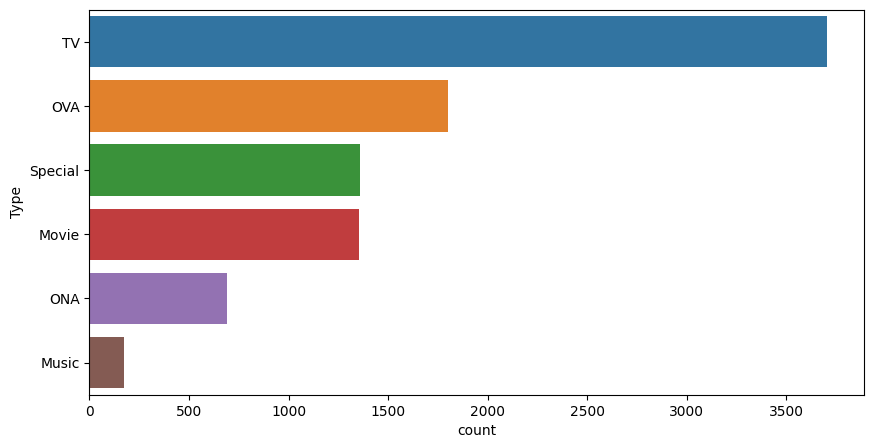

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime_2 , y = 'Type' , order = df_anime_2['Type'].value_counts().index)

### Rango de episodios

In [ ]:
re = df_anime_2['range_episodes'].value_counts().head(10).index
nre  = df_anime_2['range_episodes'].value_counts().head(10)

In [ ]:
#Top 10
nre

[1 - 13]       6507
[13 - 25]      1047
[25 - 37]       677
[49 - 61]       378
[37 - 49]       247
[61 - 73]        42
[73 - 85]        39
[97 - 109]       35
[109 - 121]      17
[85 - 97]        16
Name: range_episodes, dtype: int64

<AxesSubplot:xlabel='range_episodes'>

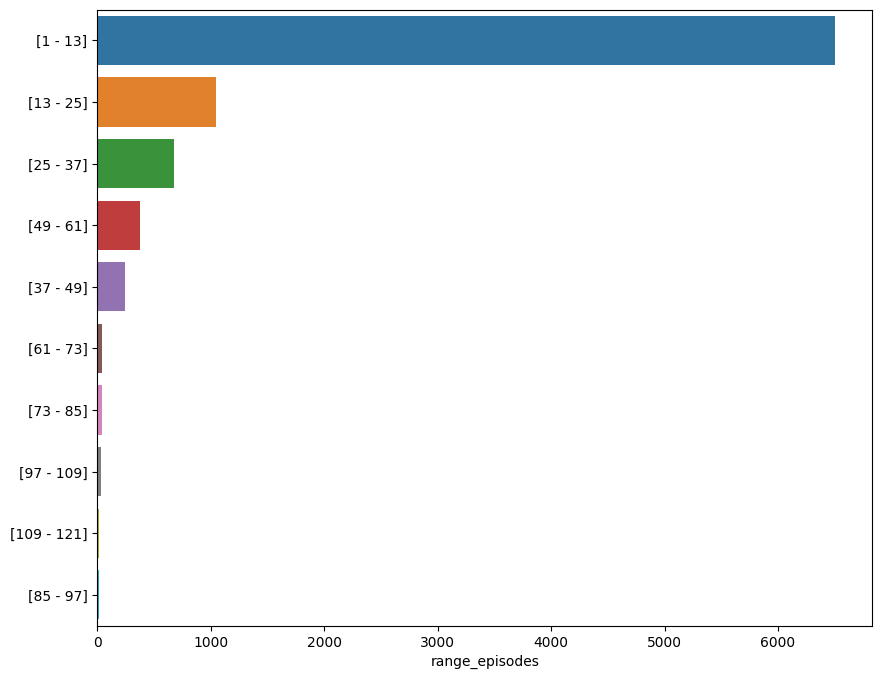

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = re , x = nre)

### Studios

In [ ]:
df_anime_2['Studios_Split'] = df_anime_2['Studios'].apply(lambda x : x.replace(' ' , ''))
df_anime_2['Studios_Split']= df_anime_2['Studios_Split'].apply(lambda x : x.split(','))

In [ ]:
studios_top10 = to_1D(df_anime_2['Studios_Split']).value_counts()[1:11].index
nstudios_top10  = to_1D(df_anime_2['Studios_Split']).value_counts()[1:11]

In [ ]:
nstudios_top10

Sunrise             469
Madhouse            354
J.C.Staff           353
ProductionI.G       308
StudioDeen          270
StudioPierrot       240
TMSEntertainment    237
OLM                 215
A-1Pictures         202
NipponAnimation     173
dtype: int64

<AxesSubplot:>

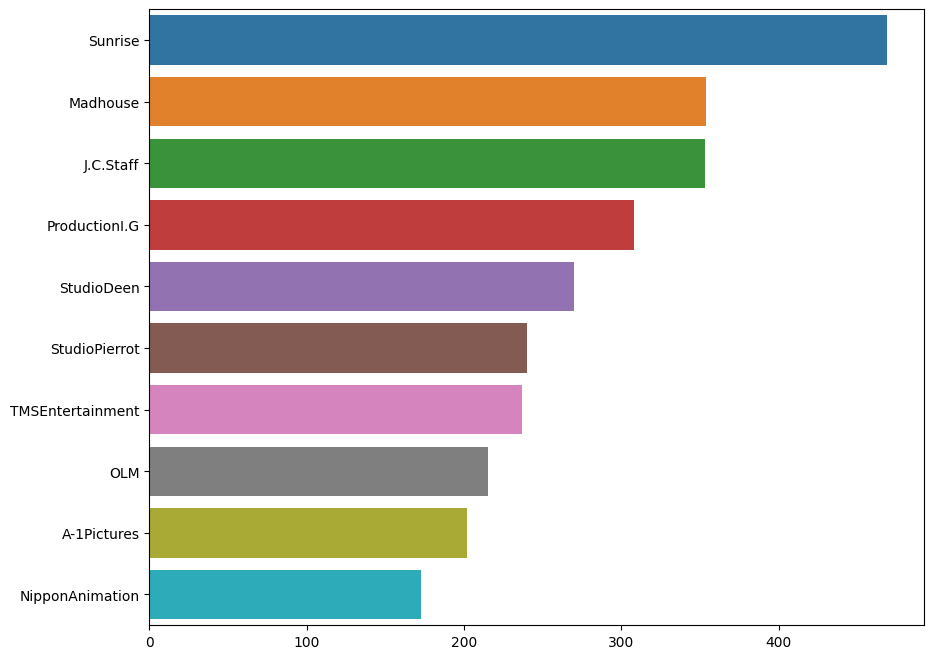

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y = studios_top10 , x = nstudios_top10 )

### Rating

In [ ]:
df_anime_2['Rating'].value_counts()

PG-13 - Teens 13 or older         4841
G - All Ages                      1394
R - 17+ (violence & profanity)     980
R+ - Mild Nudity                   757
PG - Children                      690
Rx - Hentai                        421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Rating'>

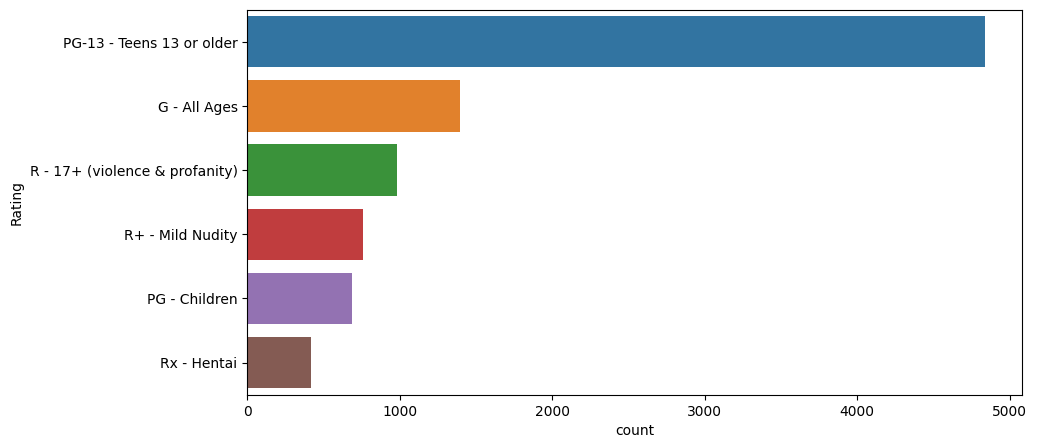

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime_2 , y = 'Rating' , order = df_anime_2['Rating'].value_counts().index)

### Start Year

In [ ]:
df_anime_2['Start_year'].unique()

array(['1998', '2001', '2002', '2004', '2005', '2003', '1995', '1997',
       '1999', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1978', '1973', '2006',
       '1987', '1984', '1982', '1983', '1980', '1976', '1968', '1977',
       '1981', '2007', '1971', '1967', '1975', '1965', '1969', '1974',
       '1962', '1964', '2008', '1972', '1970', '1966', '1963', '1945',
       '2009', '2012', '1943', '2010', '1960', '1958', '2011', '1959',
       '1957', '1944', '1961', '2016', '2013', '2014', '2015', '2017',
       '2018', '2019', '2020', '2021'], dtype=object)

In [ ]:
syear_top10 = df_anime_2['Start_year'].value_counts().head(10).index
nsyear_top10 = df_anime_2['Start_year'].value_counts().head(10)

In [ ]:
nsyear_top10

2016    562
2017    520
2018    510
2015    483
2014    477
2012    422
2013    418
2019    400
2011    389
2010    351
Name: Start_year, dtype: int64

<AxesSubplot:xlabel='Start_year'>

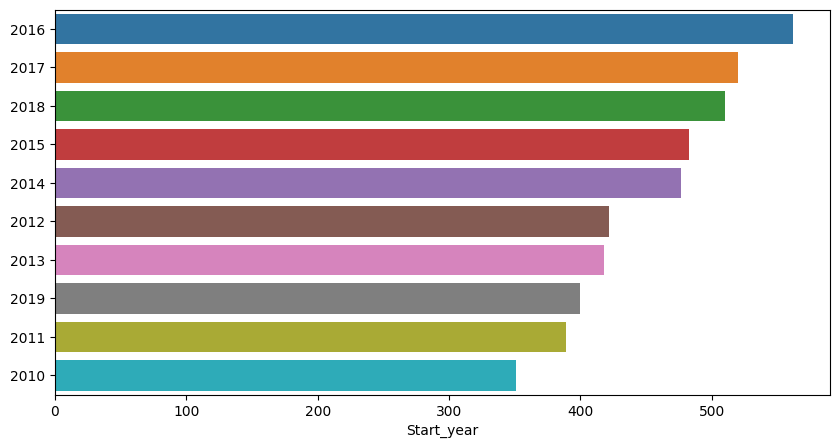

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y = syear_top10 , x = nsyear_top10 )

In [ ]:
# plt.figure(figsize=(8,5))
# squarify.plot(sizes = nsyear_top10,  label = syear_top10, alpha=0.7)
# plt.axis('off')
# plt.show()

### Start_season

In [ ]:
startseason = df_anime_2['Start_season'].value_counts().head(10).index
nstartseason = df_anime_2['Start_season'].value_counts().head(10)

In [ ]:
nstartseason

Fall      2527
Spring    2310
Summer    2146
Winter    2100
Name: Start_season, dtype: int64

<AxesSubplot:xlabel='Start_season'>

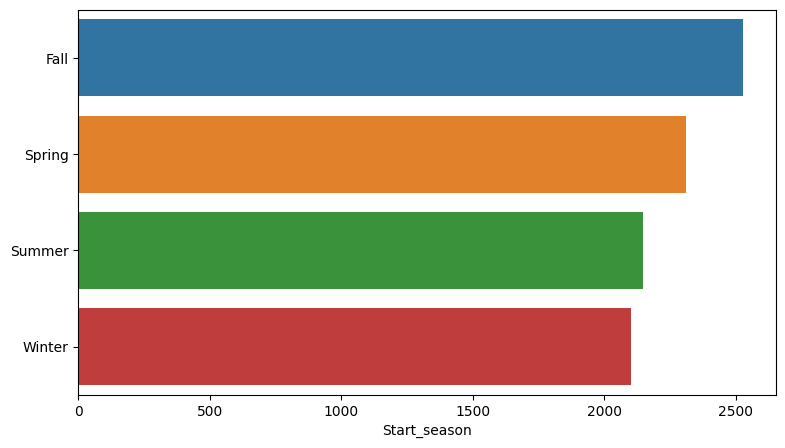

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(y = startseason, x = nstartseason )

# Análisis Bivariante

In [ ]:
def get_data(col_index_name , col_target_name): #col_name es la columna de la que queremos extraer los datos

  datos = []
  cont = 0
  index_column = df_anime_2.columns.get_loc(col_target_name) #Para saber el indice de la columna
  for list_gen in df_anime_2[col_index_name]:

    for gen in list_gen:
        
        val = df_anime_2.iloc[cont , index_column ] #encuentra el valor de la columna
        datos.append(val) #almacenar valores a la lista de datos

    cont += 1   


  return pd.Series(datos)

### Score - Episodes

<AxesSubplot:xlabel='Episodes', ylabel='Score'>

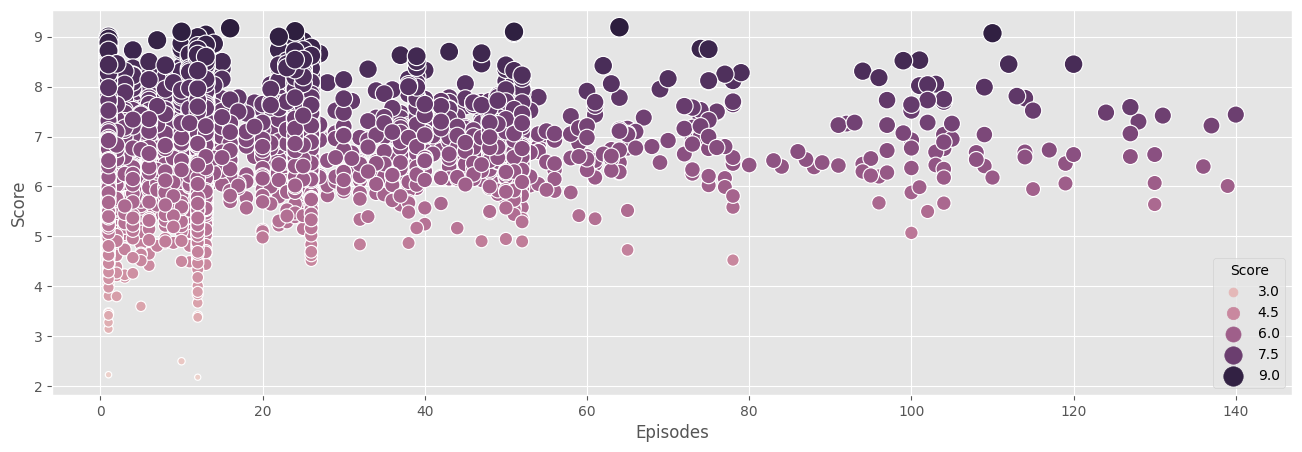

In [92]:
plt.figure(figsize=(16,5))
sns.scatterplot(data = df_anime_2 , x = 'Episodes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

In [ ]:
# Observar outliers
df_anime_2[df_anime_2.Episodes > 400].sort_values(by = 'Episodes', ascending=False)

,MAL_ID,Genres,Type,Episodes,Studios,Rating,Start_year,Start_season,Score,range_episodes,Genres_Split,Studios_Split
6742,12393,"Slice of Life, Comedy",TV,1818,Eiken,G - All Ages,1994,Fall,5.60,[1813 - 1825],"[SliceofLife, Comedy]",[Eiken]
2266,2471,"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787,Shin-Ei Animation,PG - Children,1979,Spring,7.70,[1777 - 1789],"[Adventure, Comedy, Fantasy, Kids, Sci-Fi, Sho...",[Shin-EiAnimation]
4536,6277,"Fantasy, Historical",TV,1471,Group TAC,G - All Ages,1976,Winter,6.00,[1465 - 1477],"[Fantasy, Historical]",[GroupTAC]
5282,8213,Comedy,TV,1428,Eiken,G - All Ages,1976,Fall,5.80,[1417 - 1429],[Comedy],[Eiken]
3891,4936,"Slice of Life, Comedy, Martial Arts, Shounen",TV,694,Shin-Ei Animation,G - All Ages,1981,Fall,6.81,[685 - 697],"[SliceofLife, Comedy, MartialArts, Shounen]",[Shin-EiAnimation]
6570,11595,"Kids, Comedy, Super Power, School",TV,526,Shin-Ei Animation,PG - Children,1983,Spring,6.41,[517 - 529],"[Kids, Comedy, SuperPower, School]",[Shin-EiAnimation]
1574,1735,"Action, Adventure, Comedy, Super Power, Martia...",TV,500,Studio Pierrot,PG-13 - Teens 13 or older,2007,Winter,8.16,[493 - 505],"[Action, Adventure, Comedy, SuperPower, Martia...",[StudioPierrot]


In [ ]:
# Remover outliers encontrados
df_anime_2 = df_anime_2[~(df_anime_2.Episodes > 400)]

<AxesSubplot:xlabel='Episodes', ylabel='Score'>

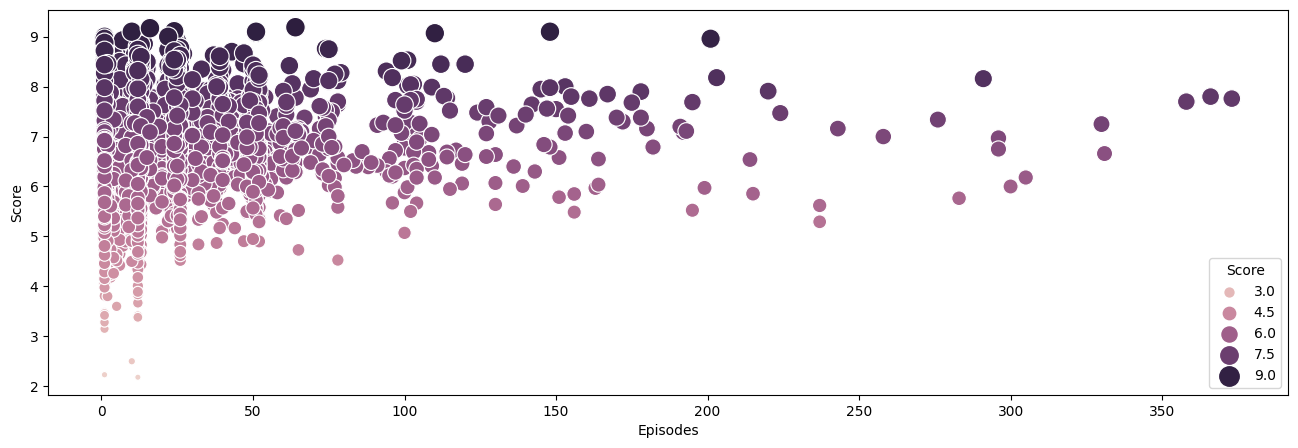

In [ ]:
plt.figure(figsize=(16,5))
sns.scatterplot(data = df_anime_2 , x = 'Episodes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

Podemos ver que, los animes con episodios más cortos en mayoría tienen más puntuación.

In [ ]:
corr_r = df_anime_2['Episodes'].corr(df_anime_2['Score'] , method = 'pearson')
corr_r

0.10417937759563568

Nos indica una correlación mínima

In [ ]:
(corr_r**2)*100

1.0853342716214038

Gracias al coeficiente de determinación, podemos decir que la relación entre la cantidad de episodios de los animes y su puntaje es lineal (positiva o creciente) solo en un 1.09 por ciento.

### Score - Rango_Episodios

<AxesSubplot:xlabel='Score', ylabel='range_episodes'>

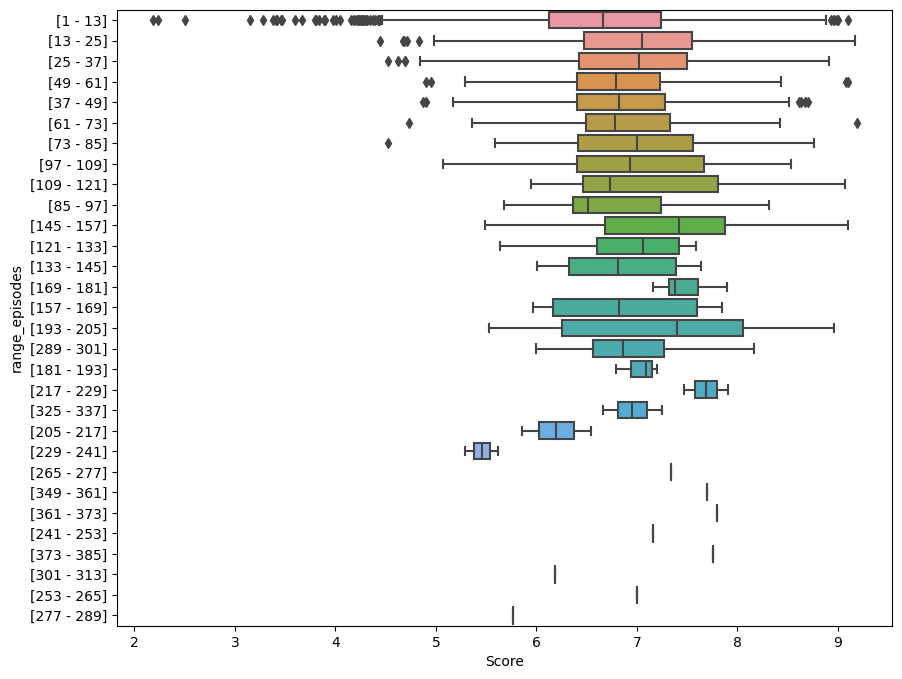

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y= 'range_episodes', x = 'Score' , data= df_anime_2 ,
            order = df_anime_2['range_episodes'].value_counts().index)

In [ ]:
corr_p = df_anime_2['range_episodes'].corr(df_anime_2['Score'] , method = 'spearman')
corr_p

0.14843543404273812

### Score - Genres

In [ ]:
score_get = get_data('Genres_Split' , 'Score')

In [ ]:
df_anime_aux = pd.DataFrame()

In [ ]:
#Se crea el df con los generos separados por el score
df_anime_aux['Genres'] = to_1D(df_anime_2['Genres_Split'])
df_anime_aux['Score'] = score_get
df_anime_aux.head()

,Genres,Score
0,Action,8.78
1,Adventure,8.78
2,Comedy,8.78
3,Drama,8.78
4,Sci-Fi,8.78


In [ ]:
gen_score__median_top10  = df_anime_aux.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
gen_score__median_top10

,Genres,Score
39,Thriller,7.510
24,Psychological,7.330
21,Mystery,7.255
32,Shounen,7.140
14,Josei,7.130
6,Drama,7.120
23,Police,7.105
38,Supernatural,7.100
29,Seinen,7.080
19,Military,7.080


<AxesSubplot:xlabel='Score', ylabel='Genres'>

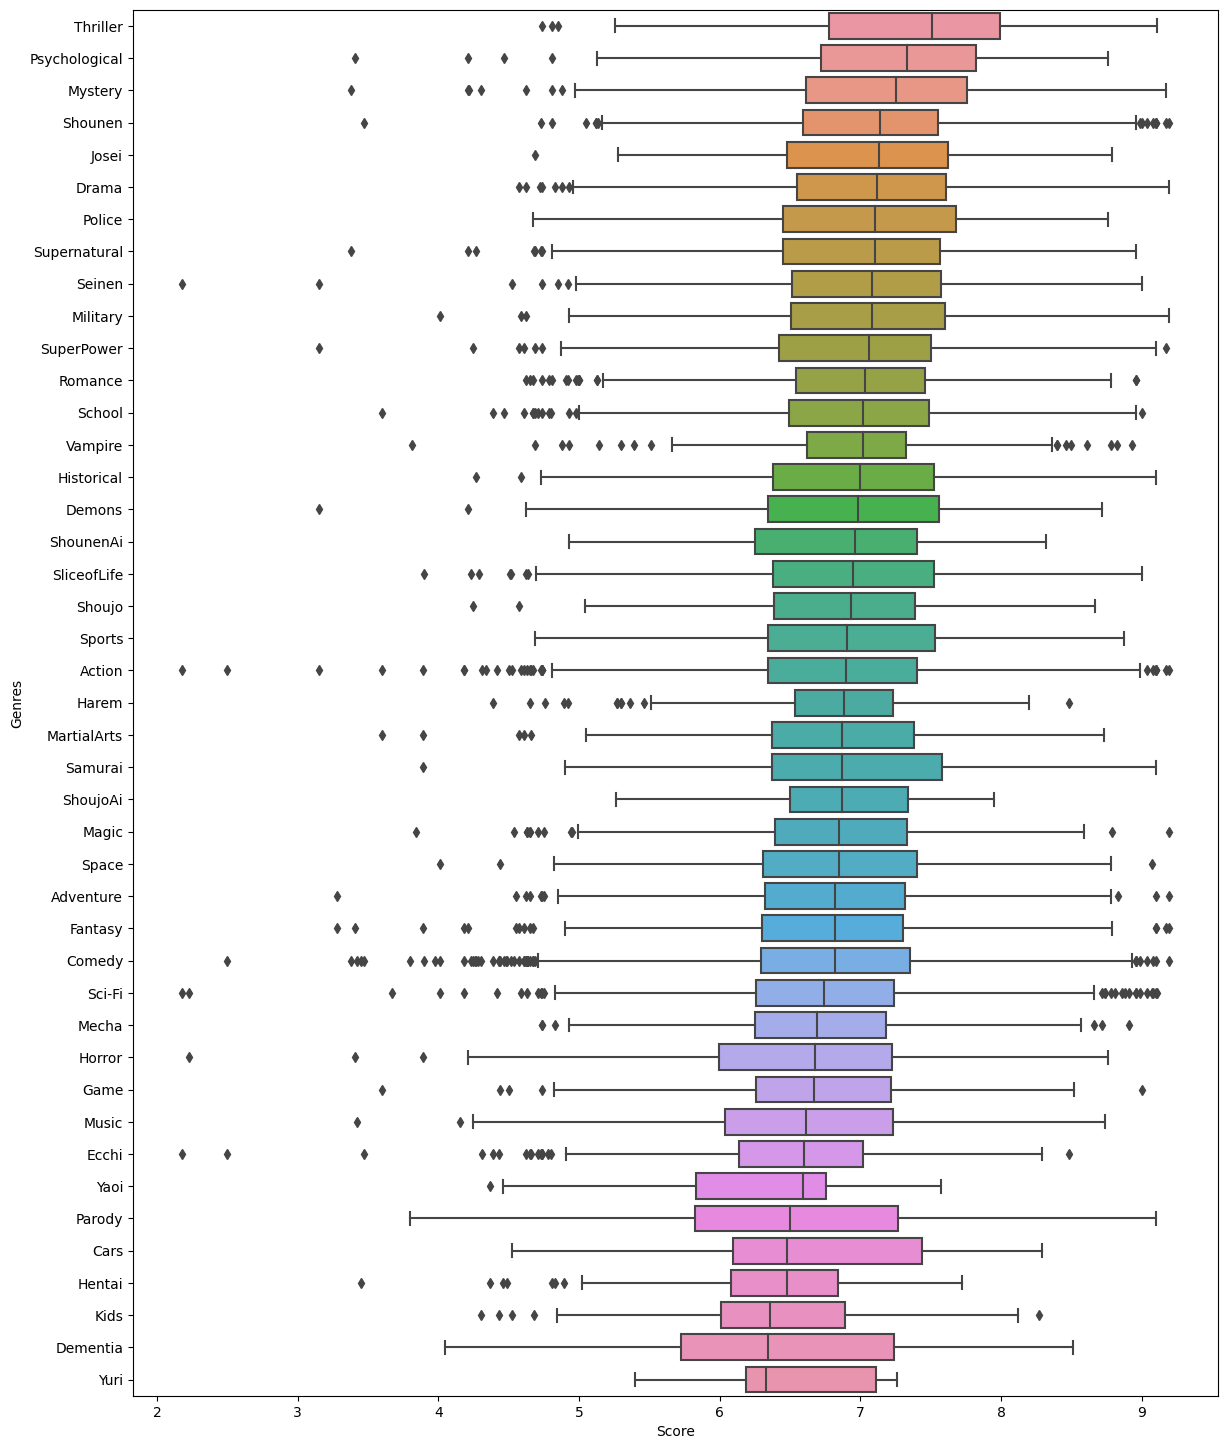

In [ ]:
order_graph = df_anime_aux.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)
plt.figure(figsize=(14,18))
sns.boxplot(y= 'Genres', x = 'Score' , data= df_anime_aux ,
            order = order_graph['Genres'])

In [ ]:
fil = df_anime_aux[df_anime_aux['Genres'].isin(gen_score__median_top10['Genres'])]
fil

,Genres,Score
3,Drama,8.78
7,Drama,8.39
8,Mystery,8.39
15,Drama,8.24
16,Shounen,8.24
...,...,...
32057,Mystery,4.81
32058,Psychological,4.81
32059,Supernatural,4.81
32060,Thriller,4.81


<AxesSubplot:xlabel='Genres', ylabel='Score'>

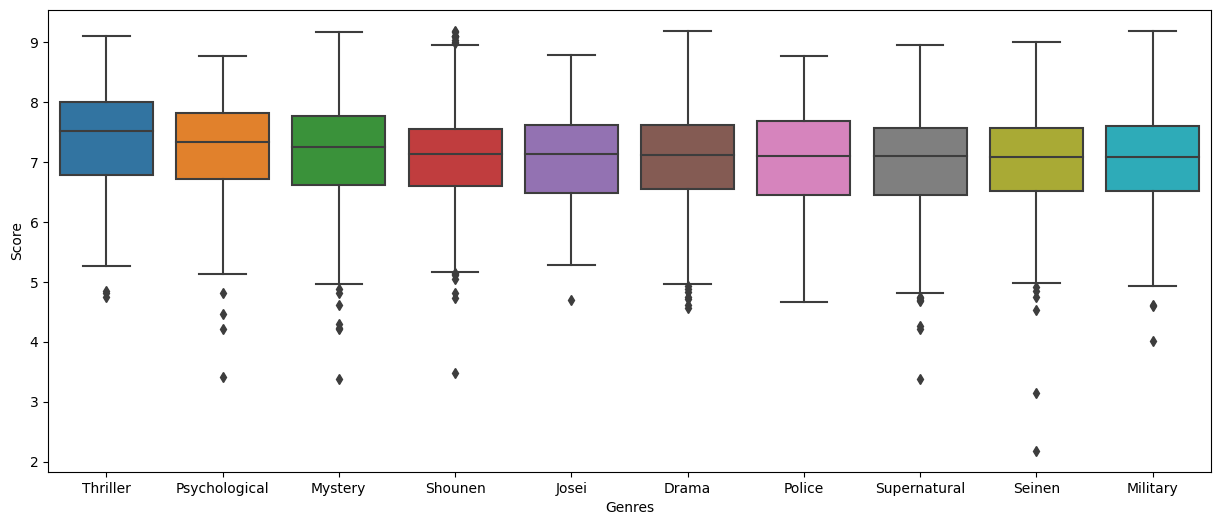

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres', y = 'Score' , data= fil , order = gen_score__median_top10['Genres'] )

In [ ]:
filgenres_top10 = df_anime_aux[df_anime_aux['Genres'].isin(gs_top10)]
filgenres_top10

,Genres,Score
0,Action,8.780000
1,Adventure,8.780000
2,Comedy,8.780000
3,Drama,8.780000
4,Sci-Fi,8.780000
...,...,...
32051,Fantasy,6.515152
32052,Sci-Fi,6.410000
32056,Romance,7.520000
32061,Shounen,4.810000


In [ ]:
gen_score__median_top10  = filgenres_top10.groupby(['Genres'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

gen_score__median_top10

,Genres,Score
8,Shounen,7.140
3,Drama,7.120
5,Romance,7.030
6,School,7.020
9,SliceofLife,6.945
0,Action,6.900
1,Adventure,6.820
2,Comedy,6.820
4,Fantasy,6.820
7,Sci-Fi,6.740


<AxesSubplot:xlabel='Genres', ylabel='Score'>

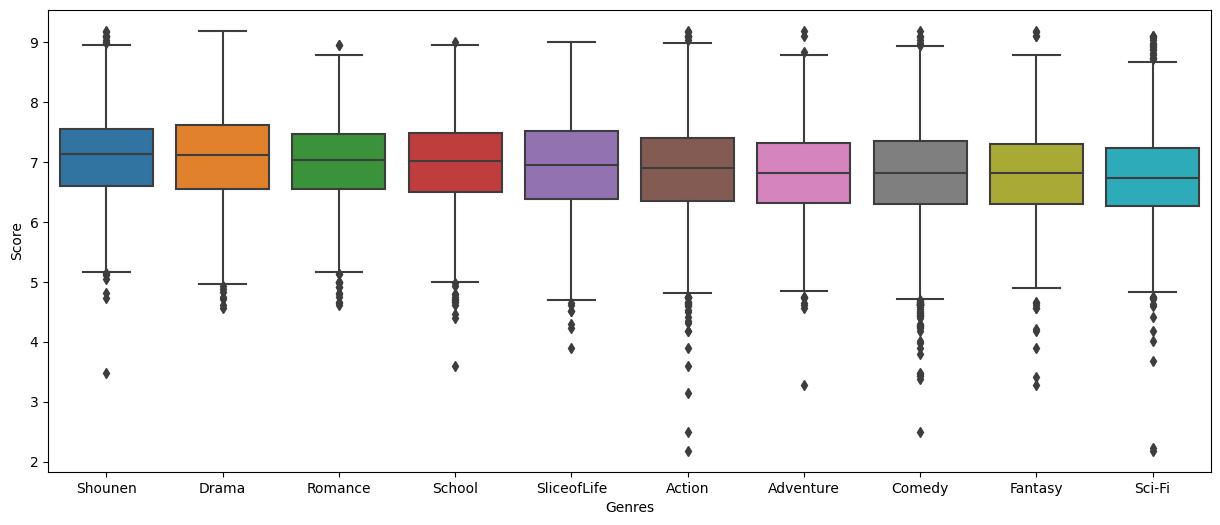

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres' , y = 'Score', data = filgenres_top10 , order= gen_score__median_top10['Genres'] )

### Score - Type

In [ ]:
df_anime_2.groupby(['Type']).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

,Score
Type,
Movie,7.01
TV,6.91
Special,6.60
OVA,6.55
ONA,6.36
Music,6.34


<AxesSubplot:xlabel='Score', ylabel='Type'>

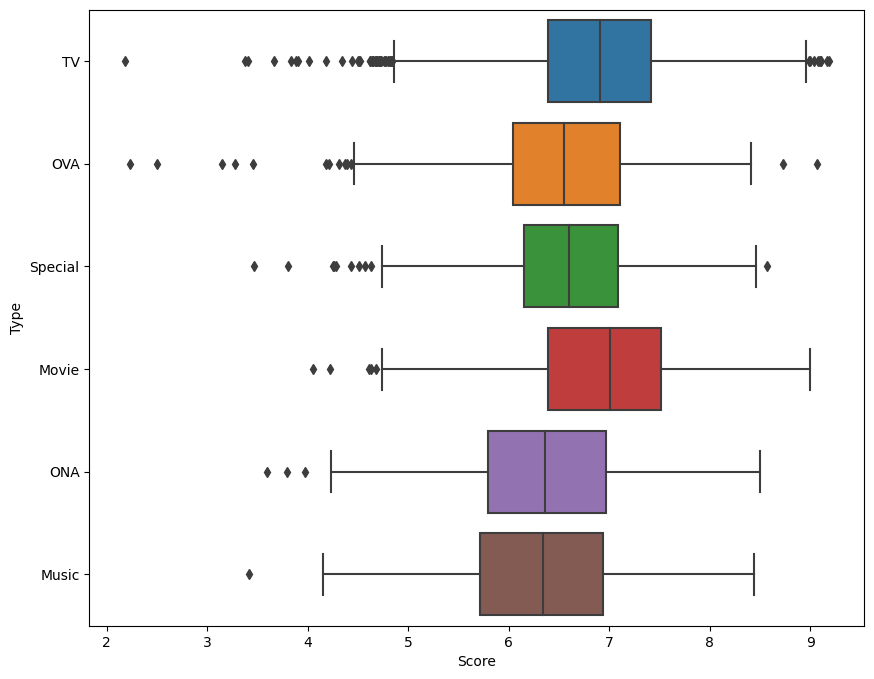

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y= 'Type', x = 'Score' , data= df_anime_2 ,
            order = df_anime_2['Type'].value_counts().index)

### Score - Studios

In [ ]:
score_get = get_data('Studios_Split', 'Score')
df_anime_aux2 = pd.DataFrame() #New DataFrame

#Set the producers columns with their score
df_anime_aux2['Studios'] = to_1D(df_anime_2['Studios_Split'])
df_anime_aux2['Score'] = score_get
df_anime_aux2.head()

,Studios,Score
0,Sunrise,8.78
1,Bones,8.39
2,Madhouse,8.24
3,Sunrise,7.27
4,ToeiAnimation,6.98


In [ ]:
std_score__median_top10  = df_anime_aux2.groupby(['Studios'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
std_score__median_top10

,Studios,Score
463,StudioBind,8.370
153,EggFirm,8.335
467,StudioChizu,8.330
324,NipponRamayanaFilmCo.,8.040
106,Colored-PencilAnimationDesign,8.030
435,Shuka,8.010
416,SamsaraAnimationStudio,8.000
137,DjinnPower,7.830
448,SquareEnix,7.760
388,PurpleCowStudioJapan,7.720


In [ ]:
fil2 = df_anime_aux2[df_anime_aux2['Studios'].isin(std_score__median_top10['Studios'])]
fil2

,Studios,Score
308,SquareEnix,7.760
1261,SquareEnix,6.370
2446,SquareEnix,7.960
3222,NipponRamayanaFilmCo.,8.040
5023,StudioChizu,8.640
5046,PurpleCowStudioJapan,8.050
5186,PurpleCowStudioJapan,7.390
6219,Shuka,8.030
6585,Shuka,8.010
6586,Shuka,8.100


<AxesSubplot:xlabel='Studios', ylabel='Score'>

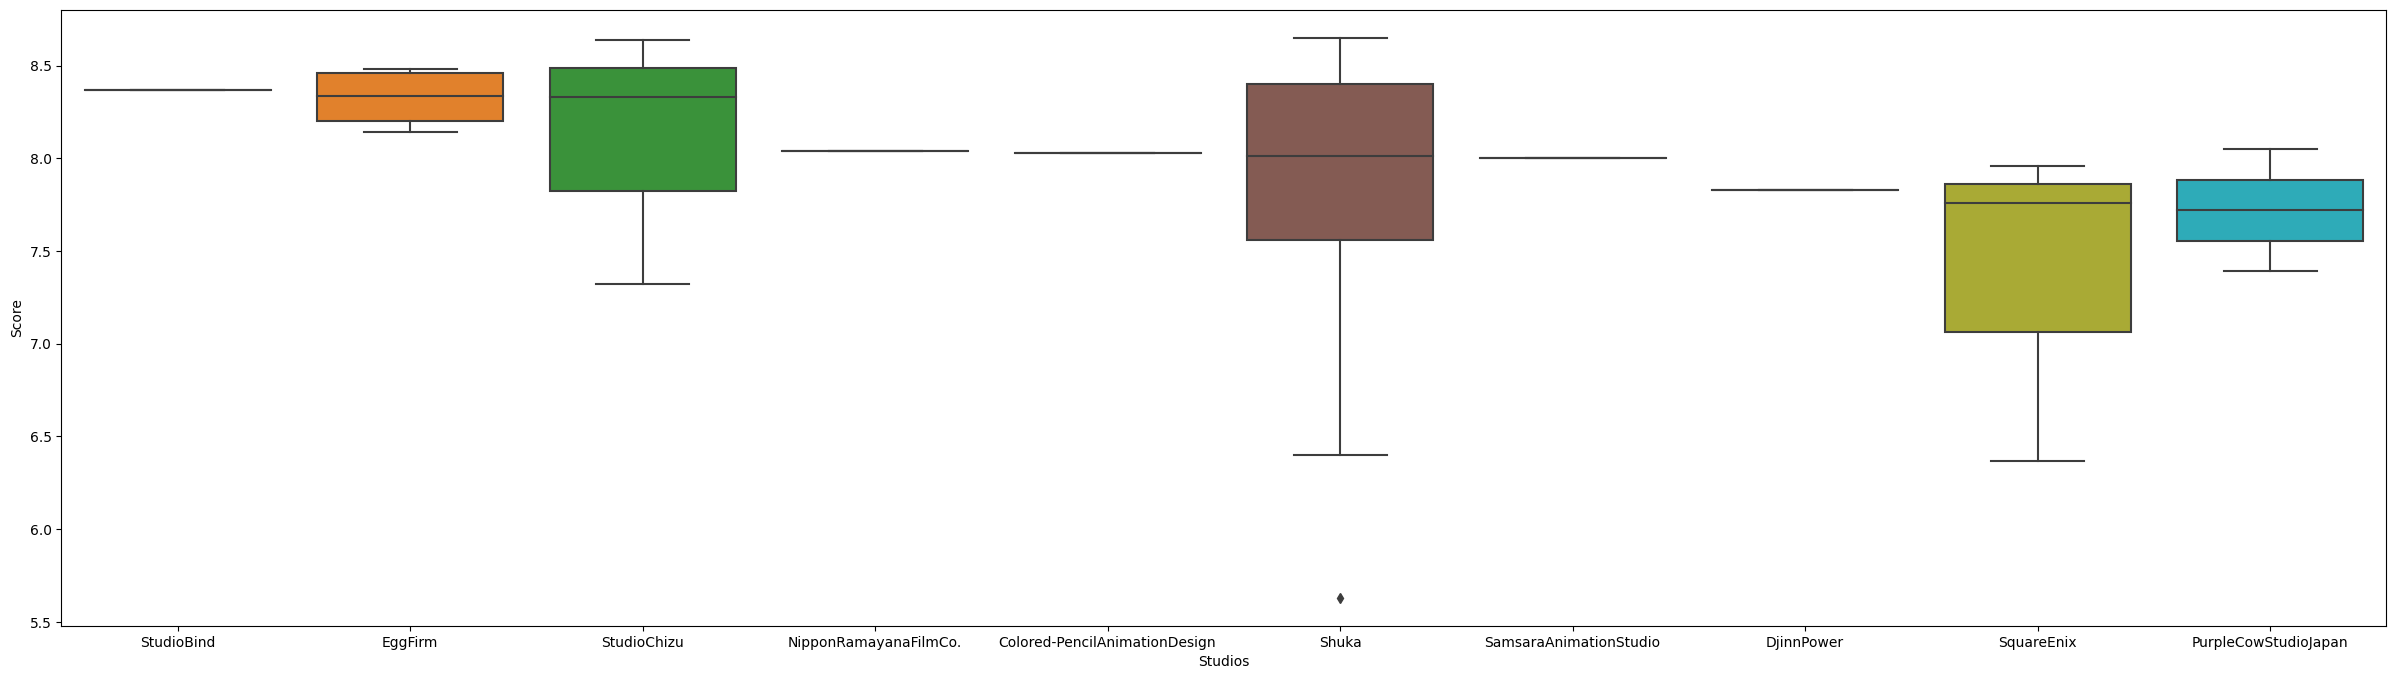

In [ ]:
plt.figure(figsize=(30,8))
sns.boxplot(x = 'Studios', y = 'Score' , data= fil2, order = std_score__median_top10['Studios'] )

In [ ]:
fil2_top10 = df_anime_aux2[df_anime_aux2['Studios'].isin(studios_top10)]
fil2_top10

,Studios,Score
0,Sunrise,8.780000
2,Madhouse,8.240000
3,Sunrise,7.270000
6,J.C.Staff,8.060000
7,NipponAnimation,7.590000
...,...,...
9720,StudioPierrot,7.420000
9751,Sunrise,7.010000
9758,Sunrise,7.807107
9778,TMSEntertainment,7.130000


In [ ]:
std_score__median_top10  = fil2_top10.groupby(['Studios'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

std_score__median_top10

,Studios,Score
0,A-1Pictures,7.205000
5,ProductionI.G,7.165000
6,StudioDeen,7.105000
9,TMSEntertainment,7.010000
2,Madhouse,6.935000
1,J.C.Staff,6.910000
8,Sunrise,6.910000
7,StudioPierrot,6.820000
3,NipponAnimation,6.680000
4,OLM,6.580357


<AxesSubplot:xlabel='Studios', ylabel='Score'>

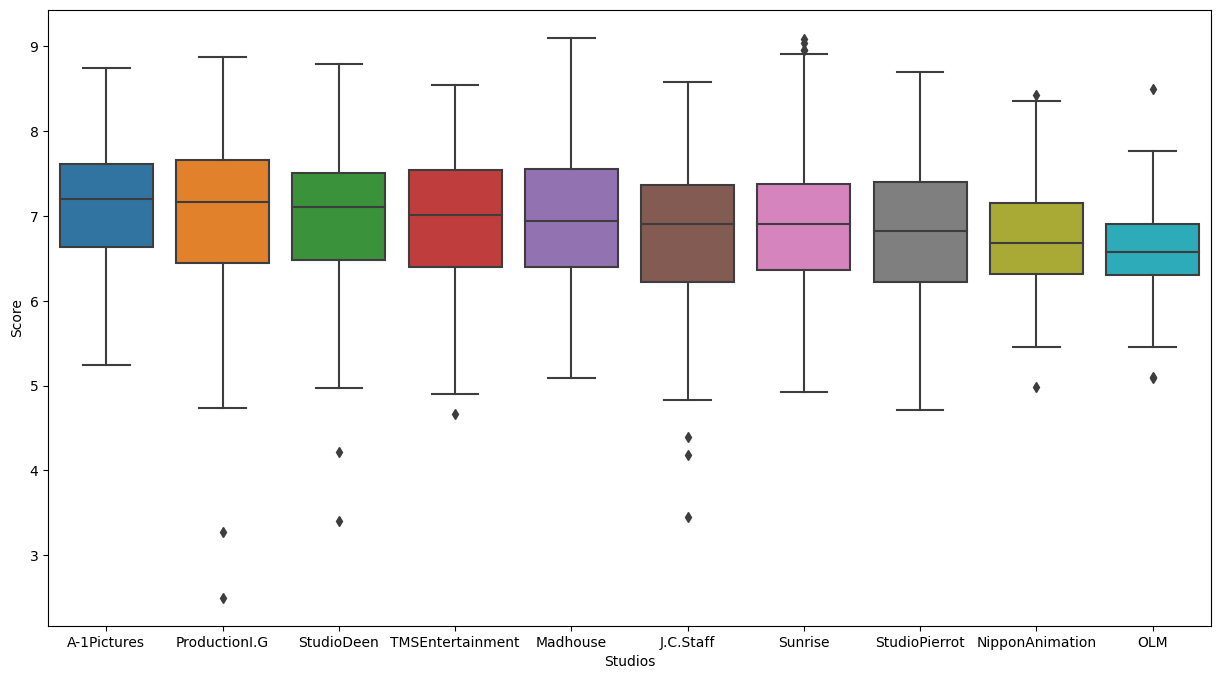

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x= 'Studios' , y = 'Score', data = fil2_top10 , order= std_score__median_top10['Studios'] )

### Score - Rating

In [ ]:
rating_score__median_top10  = df_anime_2.groupby(['Rating'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)
                                  
rating_score__median_top10

,Rating,Score
3,R - 17+ (violence & profanity),7.19
2,PG-13 - Teens 13 or older,6.88
4,R+ - Mild Nudity,6.58
1,PG - Children,6.50
5,Rx - Hentai,6.48
0,G - All Ages,6.37


<AxesSubplot:xlabel='Rating', ylabel='Score'>

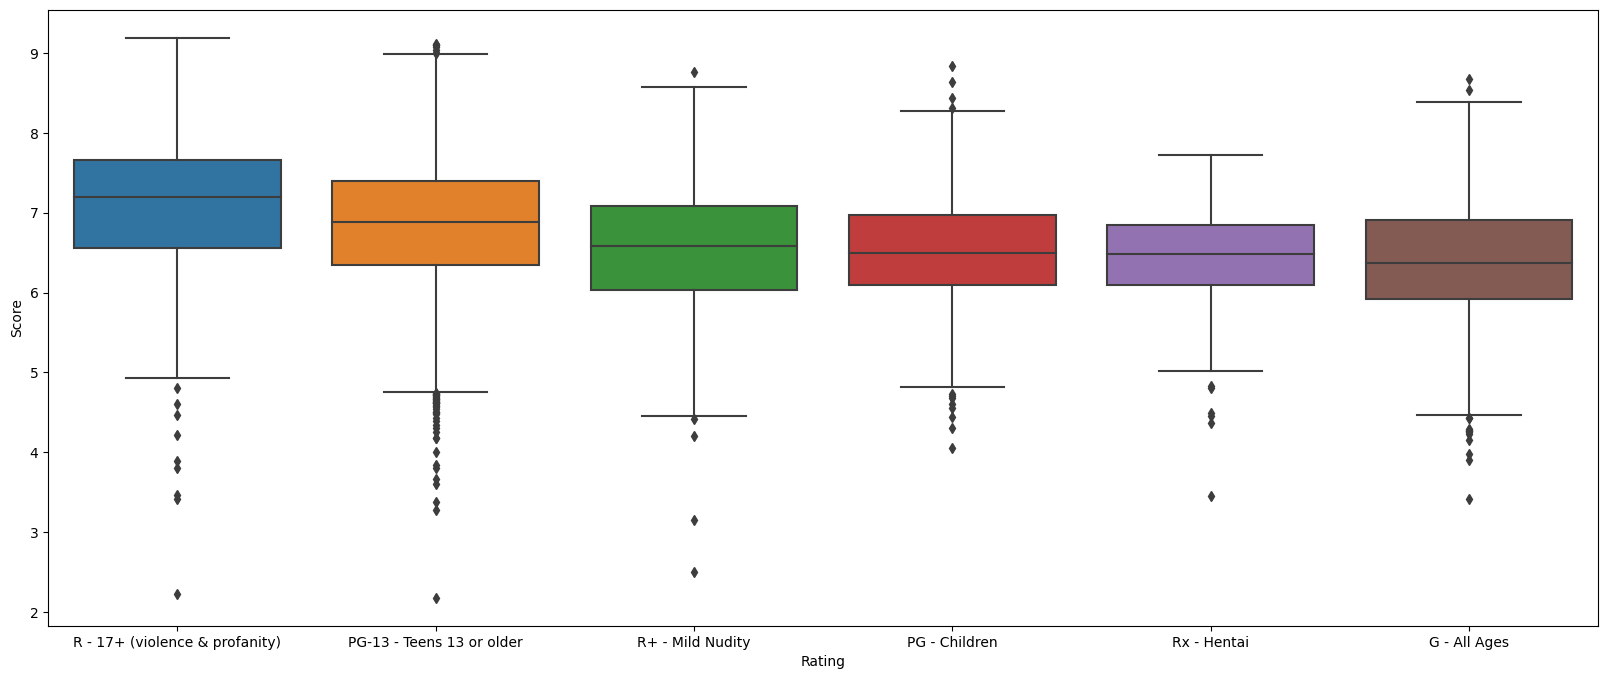

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x= 'Rating' , y = 'Score', data = df_anime_2 , order= rating_score__median_top10['Rating'] )

### Score - Start Season

<AxesSubplot:xlabel='Score', ylabel='Start_season'>

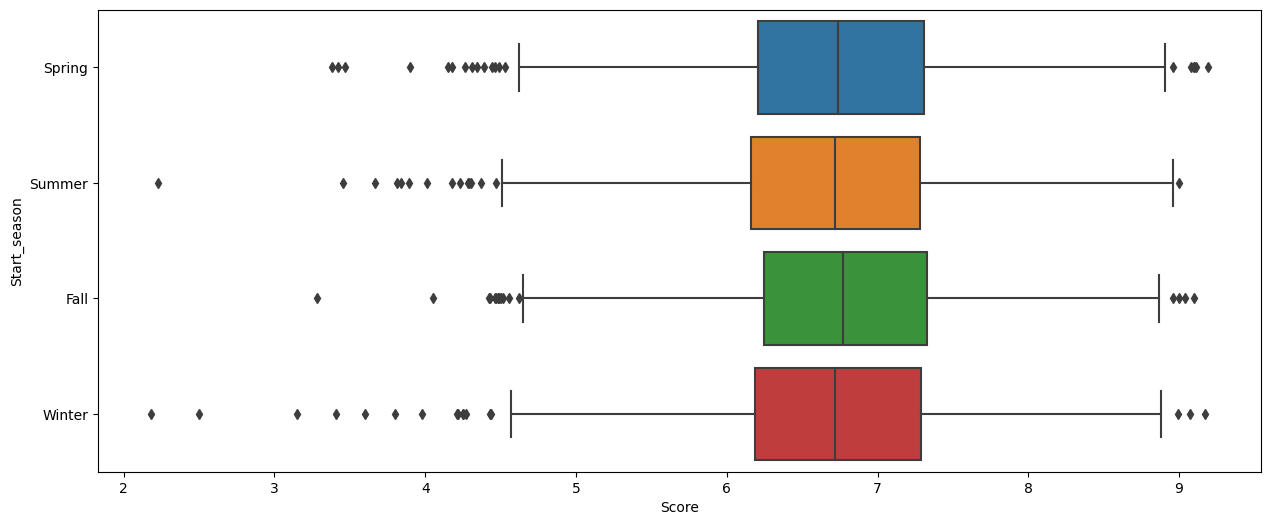

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Score', y = 'Start_season' , data= df_anime_2 )

In [ ]:
df_score_season  = df_anime_2.groupby(['Start_season'] , 
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

df_score_season

,Start_season,Score
0,Fall,6.77
1,Spring,6.74
2,Summer,6.72
3,Winter,6.72


In [ ]:
df_anime_2.head(5)

,MAL_ID,Genres,Type,Episodes,Studios,Rating,Start_year,Start_season,Score,range_episodes,Genres_Split,Studios_Split
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Sunrise,R - 17+ (violence & profanity),1998,Spring,8.78,[25 - 37],"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[Sunrise]
1,5,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Bones,R - 17+ (violence & profanity),2001,Summer,8.39,[1 - 13],"[Action, Drama, Mystery, Sci-Fi, Space]",[Bones]
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Madhouse,PG-13 - Teens 13 or older,1998,Spring,8.24,[25 - 37],"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",[Madhouse]
3,7,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,Sunrise,PG-13 - Teens 13 or older,2002,Summer,7.27,[25 - 37],"[Action, Mystery, Police, Supernatural, Drama,...",[Sunrise]
4,8,"Adventure, Fantasy, Shounen, Supernatural",TV,52,Toei Animation,PG - Children,2004,Fall,6.98,[49 - 61],"[Adventure, Fantasy, Shounen, Supernatural]",[ToeiAnimation]


In [ ]:
#Eliminar columnas que sobran
df_anime_2.drop(['Genres_Split','Studios_Split','Start_year'] , axis = 1 , inplace = True)

In [ ]:
df_anime_2.to_csv(path + "data/processed/anime.csv")